## 순환 신경망 (LSTM) 활용 주가 예측 이용하여 TEST 예측하기


https://tbacking.com/2017/08/18/%EC%88%9C%ED%99%98-%EC%8B%A0%EA%B2%BD%EB%A7%9D-lstm-%ED%99%9C%EC%9A%A9-%EC%A3%BC%EA%B0%80-%EC%98%88%EC%B8%A1/

In [1]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
look_back = 1
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [3]:
# file location

os.getcwd()

'D:\\mywork\\DACON_CONTEST_2019\\SOOMIN'

In [4]:
# file loader and index

os.chdir('D:\\mywork\\DACON_CONTEST_2019')

df = pd.read_csv('.\\SOOMIN\\data\\TEST_DHweightDaconArima_NAFilled.csv')
df['Time'] = pd.to_datetime(df['Time']) 
df = df.set_index('Time')

df1 = df['2018-04-17':]*1000 # kWh -> Wh로 변환, 4월 17일 기점이 90퍼센트의 값들이 들어있는 곳.

In [5]:
# X26 use =0, X303 use =1 
number = 1 
col_number = df1.iloc[:, number].to_frame()
col_number

,X303
Time,
2018-04-17 00:00:00,444.000000
2018-04-17 01:00:00,385.000000
2018-04-17 02:00:00,363.000000
2018-04-17 03:00:00,273.000000
2018-04-17 04:00:00,341.000000
2018-04-17 05:00:00,330.000000
2018-04-17 06:00:00,401.000000
2018-04-17 07:00:00,485.000000
2018-04-17 08:00:00,601.000000


In [6]:
# convert nparray
nparr = col_number.values[::-1]
nparr.astype('float32')
print(nparr)

[[481.]
 [539.]
 [883.]
 ...
 [363.]
 [385.]
 [444.]]


In [7]:
# normalization
scaler = MinMaxScaler(feature_range=(0, 1))
nptf = scaler.fit_transform(nparr)
nptf

array([[0.19843822],
       [0.22508039],
       [0.383096  ],
       ...,
       [0.14423519],
       [0.15434084],
       [0.18144235]])

In [8]:
# split train, test
train_size = 1680
test_size = len(nptf) - train_size
train, test = nptf[0:train_size], nptf[train_size:len(nptf)]
print(len(train), len(test))

1680 120


In [9]:
# create dataset for learning
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape[0], trainX.shape[1])

1678 1


In [10]:
trainX

array([[[0.19843822]],

       [[0.22508039]],

       [[0.383096  ]],

       ...,

       [[0.15480018]],

       [[0.15939366]],

       [[0.14331649]]])

In [11]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [12]:
from keras.layers.recurrent import GRU

In [13]:
# simple lstm network learning
model = Sequential()
model.add(GRU(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
 - 3s - loss: 0.0168
Epoch 2/100
 - 2s - loss: 0.0125
Epoch 3/100
 - 2s - loss: 0.0121
Epoch 4/100
 - 2s - loss: 0.0121
Epoch 5/100
 - 2s - loss: 0.0120
Epoch 6/100
 - 2s - loss: 0.0120
Epoch 7/100
 - 2s - loss: 0.0120
Epoch 8/100
 - 2s - loss: 0.0120
Epoch 9/100
 - 2s - loss: 0.0118
Epoch 10/100
 - 2s - loss: 0.0119
Epoch 11/100
 - 2s - loss: 0.0118
Epoch 12/100
 - 2s - loss: 0.0119
Epoch 13/100
 - 2s - loss: 0.0118
Epoch 14/100
 - 2s - loss: 0.0118
Epoch 15/100
 - 2s - loss: 0.0117
Epoch 16/100
 - 2s - loss: 0.0117
Epoch 17/100
 - 2s - loss: 0.0117
Epoch 18/100
 - 2s - loss: 0.0116
Epoch 19/100
 - 2s - loss: 0.0116
Epoch 20/100
 - 2s - loss: 0.0117
Epoch 21/100
 - 2s - loss: 0.0116
Epoch 22/100
 - 2s - loss: 0.0116
Epoch 23/100
 - 2s - loss: 0.0116
Epoch 24/100
 - 2s - loss: 0.0115
Epoch 25/100
 - 2s - loss: 0.0116
Epoch 26/100
 - 2s - loss: 0.0115
Epoch 27/100
 - 2s - loss

In [14]:
# make prediction
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Train Score: %.2f RMSE' % testScore)

Train Score: 161.42 RMSE


In [15]:
# predict last value (or tomorrow?)
lastX = nptf[-1]
lastX = np.reshape(lastX, (1, 1, 1))
lastY = model.predict(lastX)
lastY_trans = (scaler.inverse_transform(lastY))


print("Predict value of final day_1h: %d" % lastY_trans)  # 데이터 입력 마지막 다음날 종가 예측

Predict value of final day_1h: 510


In [16]:
lastY_list = []
hour = 1
while hour < 25:
    if hour == 1:
        lastX = nptf[-1]
        lastX = np.reshape(lastX, (1, 1, 1))
    
    if hour != 1:
        lastX = np.reshape(lastY, (1, 1, 1))
    lastY = model.predict(lastX)
    lastY_trans = scaler.inverse_transform(lastY)
    lastY_list.append(lastY_trans/1000)
    
    print(hour, '시간입니다.', lastY_trans/1000)
    if hour == 25:
        print('작업이 끝났습니다.')
    hour += 1
lastY_list

1 시간입니다. [[0.5104184]]
2 시간입니다. [[0.5651154]]
3 시간입니다. [[0.6072726]]
4 시간입니다. [[0.6379406]]
5 시간입니다. [[0.6592386]]
6 시간입니다. [[0.6735243]]
7 시간입니다. [[0.6828736]]
8 시간입니다. [[0.688891]]
9 시간입니다. [[0.69272137]]
10 시간입니다. [[0.6951424]]
11 시간입니다. [[0.6966655]]
12 시간입니다. [[0.6976211]]
13 시간입니다. [[0.69821954]]
14 시간입니다. [[0.69859374]]
15 시간입니다. [[0.6988277]]
16 시간입니다. [[0.69897383]]
17 시간입니다. [[0.69906515]]
18 시간입니다. [[0.69912213]]
19 시간입니다. [[0.6991577]]
20 시간입니다. [[0.6991799]]
21 시간입니다. [[0.6991938]]
22 시간입니다. [[0.6992025]]
23 시간입니다. [[0.6992079]]
24 시간입니다. [[0.6992112]]


[array([[0.5104184]], dtype=float32),
 array([[0.5651154]], dtype=float32),
 array([[0.6072726]], dtype=float32),
 array([[0.6379406]], dtype=float32),
 array([[0.6592386]], dtype=float32),
 array([[0.6735243]], dtype=float32),
 array([[0.6828736]], dtype=float32),
 array([[0.688891]], dtype=float32),
 array([[0.69272137]], dtype=float32),
 array([[0.6951424]], dtype=float32),
 array([[0.6966655]], dtype=float32),
 array([[0.6976211]], dtype=float32),
 array([[0.69821954]], dtype=float32),
 array([[0.69859374]], dtype=float32),
 array([[0.6988277]], dtype=float32),
 array([[0.69897383]], dtype=float32),
 array([[0.69906515]], dtype=float32),
 array([[0.69912213]], dtype=float32),
 array([[0.6991577]], dtype=float32),
 array([[0.6991799]], dtype=float32),
 array([[0.6991938]], dtype=float32),
 array([[0.6992025]], dtype=float32),
 array([[0.6992079]], dtype=float32),
 array([[0.6992112]], dtype=float32)]

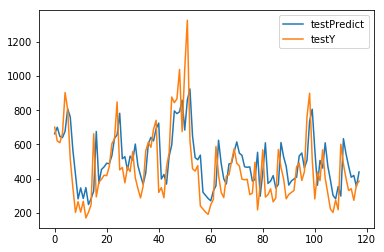

In [17]:
# plot
plt.plot(testPredict, label='testPredict')
plt.plot(testY,  label='testY')
plt.legend()
plt.show()



[X26] col = 0 <br>
[array([[1.1563833]], dtype=float32),<br>
 array([[1.222906]], dtype=float32),<br>
 array([[1.2871604]], dtype=float32),<br>
 array([[1.3482187]], dtype=float32),<br>
 array([[1.4053093]], dtype=float32),<br>
 array([[1.4578598]], dtype=float32),<br>
 array([[1.5055149]], dtype=float32),<br>
 array([[1.5481342]], dtype=float32),<br>
 array([[1.5857669]], dtype=float32),<br>
 array([[1.6186174]], dtype=float32),<br>
 array([[1.6470022]], dtype=float32),<br>
 array([[1.6713103]], dtype=float32),<br>
 array([[1.6919663]], dtype=float32),<br>
 array([[1.7094028]], dtype=float32),<br>
 array([[1.7240384]], dtype=float32),<br>
 array([[1.7362647]], dtype=float32),<br>
 array([[1.746437]], dtype=float32),<br>
 array([[1.7548723]], dtype=float32),<br>
 array([[1.7618474]], dtype=float32),<br>
 array([[1.7676022]], dtype=float32),<br>
 array([[1.7723405]], dtype=float32),<br>
 array([[1.7762363]], dtype=float32),<br>
 array([[1.7794349]], dtype=float32),<br>
 array([[1.7820584]], dtype=float32)]<br>
 
 [X303] col=1<br>
 [array([[0.47565192]], dtype=float32),<br>
 array([[0.5021242]], dtype=float32),<br>
 array([[0.5236213]], dtype=float32),<br>
 array([[0.5406402]], dtype=float32),<br>
 array([[0.55383164]], dtype=float32),<br>
 array([[0.56388396]], dtype=float32),<br>
 array([[0.57144225]], dtype=float32),<br>
 array([[0.5770671]], dtype=float32),<br>
 array([[0.5812207]], dtype=float32),<br>
 array([[0.58426994]], dtype=float32),<br>
 array([[0.586499]], dtype=float32),<br>
 array([[0.5881231]], dtype=float32),<br>
 array([[0.5893038]], dtype=float32),<br>
 array([[0.59016067]], dtype=float32),<br>
 array([[0.59078175]], dtype=float32),<br>
 array([[0.5912315]], dtype=float32),<br>
 array([[0.591557]], dtype=float32),<br>
 array([[0.5917925]], dtype=float32),<br>
 array([[0.5919628]], dtype=float32),<br>
 array([[0.5920859]], dtype=float32),<br>
 array([[0.5921749]], dtype=float32),<br>
 array([[0.59223914]], dtype=float32),<br>
 array([[0.59228563]], dtype=float32),<br>
 array([[0.5923192]], dtype=float32)]<br>